In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

In [2]:
#load lines from pickle
lines = pd.read_pickle('/Users/joshuaalbiez/Documents/python/computer_vision_streamlit_app/lines.pickle')

In [3]:
def calculate_distance(point1, point2):
    """Calculate the Euclidean distance between two points."""
    return math.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

In [4]:
def plot_circles_from_midpoints(object_part, lines_list, color):
    for line in lines_list:
        if line:  # Ensure the line isn't empty
            # Calculate midpoint of the line
            mid_idx = len(line) // 2
            midpoint = line[mid_idx]
            
            # Calculate radius
            radius = calculate_distance(midpoint, line[0])
            
            # Generate circle points in 3D
            y_circle = midpoint[0] + radius * np.cos(theta)
            z_circle = midpoint[1] + radius * np.sin(theta)
            x_circle = np.full_like(y_circle, midpoint[0])
            
            # Plot the circle
            ax.plot(x_circle, y_circle, z_circle, color=color, alpha=0.6)

NameError: name 'theta' is not defined

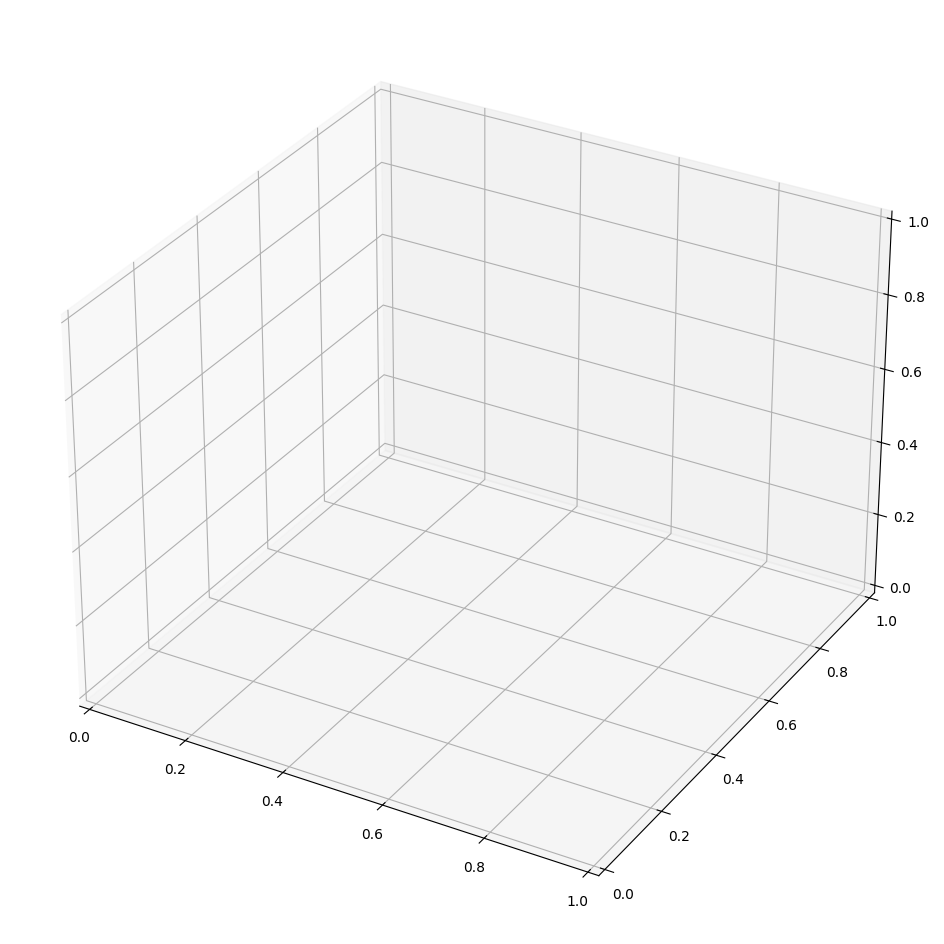

In [5]:
# Create the 3D plot
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

# Plot circles for each object_part using the midpoints
plot_circles_from_midpoints('dog', lines['dog'], 'red')
plot_circles_from_midpoints('bicycle', lines['bicycle'], 'green')
plot_circles_from_midpoints('umbrella', lines['umbrella'], 'blue')

# Setting labels, legend, and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend(['dog', 'bicycle', 'umbrella'])
ax.set_title("3D Visualization of Circles Using Midpoints of Orthogonal Lines")

plt.show()

# Return the plotting function for user execution
plot_circles_from_midpoints


In [31]:
%matplotlib inline

In [55]:
from typing import Dict, List, Tuple

class BodyVolumeVisualizer:
    
    def __init__(self, lines: Dict[str, List[List[Tuple[int, int]]]]):
        """Initialize the visualizer with the orthogonal lines.
        
        Args:
            lines: A dictionary of body parts and their orthogonal lines.
                Example: {'dog': [[(3130.2561840489834, 663),
                            (3131.0021849901395, 664), ...], ...], ...}
        """
        self.lines = lines
        self.theta = np.linspace(0, 2 * np.pi, 201)
    
    @staticmethod
    def calculate_distance(point1, point2):
        """Calculate the Euclidean distance between two points."""
        return np.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)
    
    @staticmethod
    def calculate_slope(point1, point2):
        """Calculate the slope of the line formed by two points."""
        # Avoid division by zero
        if point2[0] - point1[0] == 0:
            return np.inf
        return (point2[1] - point1[1]) / (point2[0] - point1[0])
    
    def plot_circles_from_midpoints(self, ax, lines_for_part, color, label=None):
        """Plot circles for a given set of lines using the midpoints of the orthogonal lines."""
        for idx, line in enumerate(lines_for_part):
            if len(line) > 1:  # Ensure the line isn't empty or a single point
                mid_point = line[len(line) // 2]
                radius = self.calculate_distance(mid_point, line[0])
                
                slope = self.calculate_slope(line[0], line[1])
                angle = np.arctan(slope)
                
                x_circle = mid_point[0] + radius * np.sin(self.theta) * np.cos(angle)
                y_circle = mid_point[1] + radius * np.sin(self.theta) * np.sin(angle)
                z_circle = mid_point[1] + radius * np.cos(self.theta)  # All circles share the same Z value

                z_circle -= mid_point[1]
                
                # Add label only for the first circle to avoid repetition in the legend
                ax.plot(x_circle, y_circle, z_circle, color=color, alpha=0.6, label=label if idx == 0 else "")
    
    def visualize(self):
        """Visualize the circles for each object_part in 3D."""
        fig = plt.figure(figsize=(12, 12))
        ax = fig.add_subplot(111, projection='3d')
        
        colors = ['red', 'green', 'blue']
        for idx, (object_part, lines_for_part) in enumerate(self.lines.items()):
            self.plot_circles_from_midpoints(ax, lines_for_part, colors[idx], label=object_part)

        # Setting labels, legend, and title
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')

        # Set aspect ratio and tick interval
        max_limit = max(ax.get_xlim()[1], ax.get_ylim()[1], ax.get_zlim()[1])
        ax.set_xlim(0, max_limit)
        ax.set_ylim(0, max_limit)
        ax.set_zlim(0, max_limit)
        ax.set_xticks(np.arange(0, max_limit+1, 200))
        ax.set_yticks(np.arange(0, max_limit+1, 200))
        ax.set_zticks(np.arange(0, max_limit+1, 200))

        ax.legend()
        ax.set_title("3D Visualization of Circles Using Midpoints of Orthogonal Lines")

        plt.show()


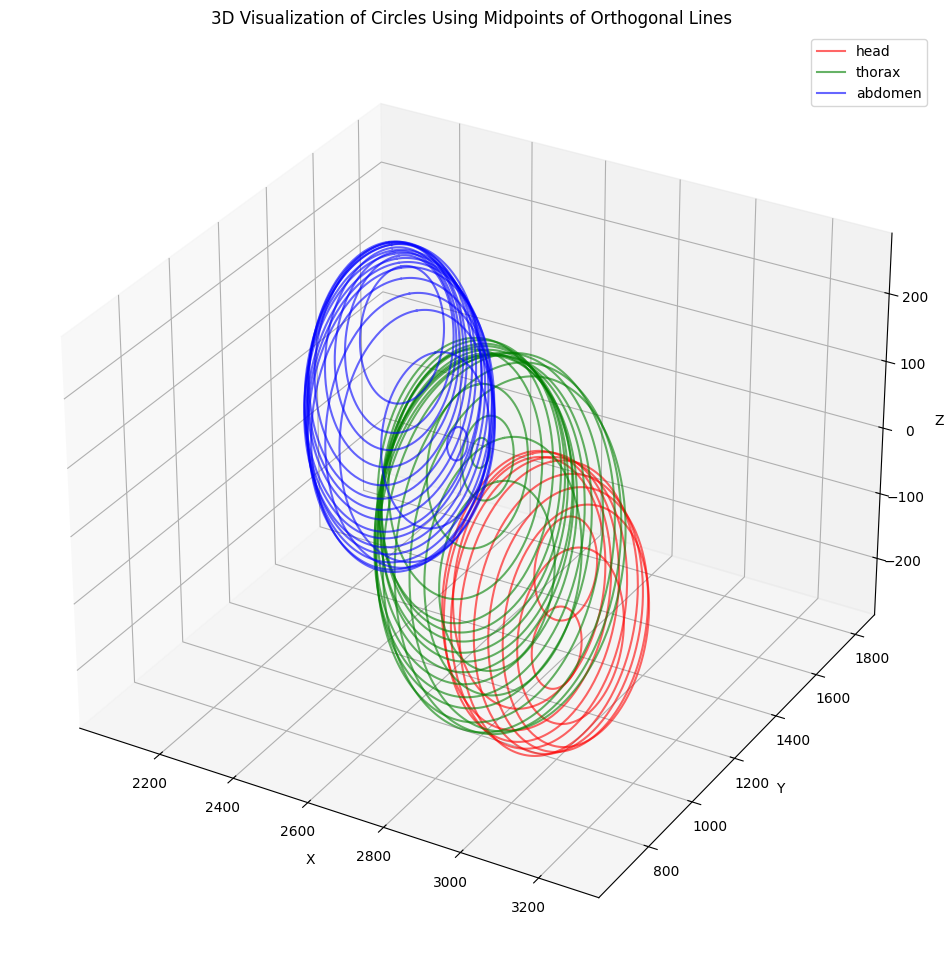

In [56]:
# Testing the class

visualizer = BodyVolumeVisualizer(lines)
visualizer.visualize()


In [30]:
plt.show()

In [11]:
lines

{'dog': [[(3130.2561840489834, 663),
   (3131.0021849901395, 664),
   (3131.748185931296, 665),
   (3132.4941868724527, 666),
   (3133.2401878136093, 667),
   (3133.986188754766, 668),
   (3134.732189695922, 669),
   (3135.4781906370786, 670),
   (3136.224191578235, 671),
   (3136.9701925193917, 672),
   (3137.7161934605483, 673),
   (3138.4621944017044, 674),
   (3139.208195342861, 675),
   (3139.9541962840176, 676),
   (3140.700197225174, 677),
   (3141.4461981663308, 678),
   (3142.1921991074873, 679),
   (3142.9382000486435, 680),
   (3143.6842009898, 681),
   (3144.4302019309566, 682),
   (3145.176202872113, 683),
   (3145.92220381327, 684),
   (3146.6682047544264, 685),
   (3147.4142056955825, 686),
   (3148.160206636739, 687),
   (3148.9062075778957, 688),
   (3149.6522085190522, 689),
   (3150.398209460209, 690),
   (3151.144210401365, 691),
   (3151.8902113425215, 692),
   (3152.636212283678, 693),
   (3153.3822132248347, 694),
   (3154.1282141659913, 695),
   (3154.8742151071